In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
real = pd.read_csv('datasets/kag_risk_factors_cervical_cancer.csv')
#print(real.columns)
real_age = real['Age'].sort_values()
real_age.reset_index(drop=True, inplace=True)
real_age_cummsum = real_age.cumsum()

In [101]:
#fake = pd.read_csv('synData/synData_ctgan.csv')
fake = pd.read_csv('datasets/synData.csv')
fake_age = fake['Age'].sort_values()
fake_age.reset_index(drop=True, inplace=True)
fake_age_cummsum = fake_age.cumsum()
fake_age_cummsum = fake_age_cummsum[:len(real_age_cummsum)]

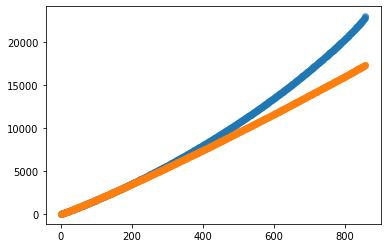

In [102]:
x1 = [i for i in range(len(real_age_cummsum))]
x2 = [i for i in range(len(fake_age_cummsum))]

plt.scatter(x1, real_age_cummsum, alpha=0.5)
plt.scatter(x2, fake_age_cummsum, alpha=0.5)
plt.show()

In [103]:
#print(real.columns)
real_smokes = real['Smokes'].sort_values()
real_smokes.reset_index(drop=True, inplace=True)
real_smokes_cummsum = real_smokes.cumsum()
print(real_smokes.dtypes)

object


In [104]:
fake_smokes = fake['Smokes'].sort_values()
fake_smokes.reset_index(drop=True, inplace=True)
fake_smokes_cummsum = fake_smokes.cumsum()

In [105]:
# x = [i for i in range(len(real_age_cummsum))]

# plt.scatter(x, real_age_cummsum, alpha=0.5)
# plt.scatter(x, fake_age_cummsum, alpha=0.5)
# plt.show()

In [110]:
def cumsum(real, fake, cols=None):
    if cols is None:
        cols = list(real.columns)
    else:
        cols = cols


    for col in cols:
        print(real[col].dtypes)
        if not (real[col].dtypes == np.int64 or real[col].dtypes == np.float16):
            print(f'The type of {col} isn\'t int or float')
            continue

        # calculating cummulative sums
        real_ = real[col].sort_values()
        real_.reset_index(drop=True, inplace=True)
        real_cummsum = real_.cumsum()

        fake_ = fake[col].sort_values()
        fake_.reset_index(drop=True, inplace=True)
        fake_cummsum = fake_.cumsum()
        fake_cummsum = fake_cummsum[:len(real_cummsum)]

        # plotting

        x1 = [i for i in range(len(real_cummsum))]
        x2 = [i for i in range(len(fake_cummsum))]

        plt.figure(figsize=(6, 6))
        plt.title(col)
        plt.scatter(x1, real_cummsum, alpha=0.5)
        plt.scatter(x2, fake_cummsum, alpha=0.5)
        plt.legend(labels=[f'Real {col}', f'Fake {col}'])
        plt.show()


int64


ValueError: x and y must be the same size

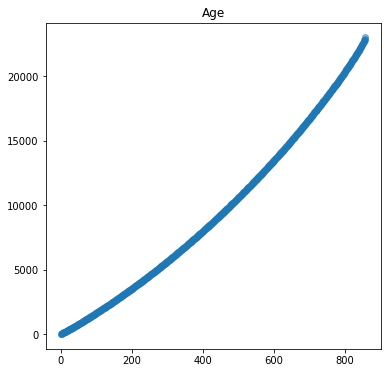

In [111]:
cumsum(real, fake)